# 1. Datetime cleaning
### This notebook is intended to organize the data based on time to be able to run the analysis.

In [64]:
# Importing the required 
import pandas as pd
from datetime import datetime  
from datetime import timedelta 
from datetime import date

In [65]:
# Importing the cleaned dataset
octubre = pd.read_csv("..\\Dataset\\October_cleaned.csv",encoding="utf_8")

In [66]:
#We make sure imported types are correct 
octubre.dtypes

Unnamed: 0              int64
station_id              int64
num_bikes_available     int64
num_docks_available     int64
status                  int64
last_updated           object
ttl                     int64
dtype: object

In [67]:
#We set 'last_updated' as datetime
octubre.last_updated = pd.to_datetime(octubre.last_updated)

In [68]:
octubre.head()

,Unnamed: 0,station_id,num_bikes_available,num_docks_available,status,last_updated,ttl
0,10250,1,27,2,1,2019-10-01 00:05:10,20
1,10251,2,12,15,1,2019-10-01 00:05:10,20
2,10252,3,18,9,1,2019-10-01 00:05:10,20
3,10253,4,14,4,1,2019-10-01 00:05:10,20
4,10254,5,36,2,1,2019-10-01 00:05:10,20


In [69]:
octubre.columns

Index(['Unnamed: 0', 'station_id', 'num_bikes_available',
       'num_docks_available', 'status', 'last_updated', 'ttl'],
      dtype='object')

In [70]:
#Dropping 'unnamed: 0' column
octubre.drop(columns='Unnamed: 0',inplace=True)

In [71]:
octubre.dtypes

station_id                      int64
num_bikes_available             int64
num_docks_available             int64
status                          int64
last_updated           datetime64[ns]
ttl                             int64
dtype: object

### Now, we want to separate the data of each station between the hours of the day, on weekdays, to understand how do they behave depending on the moment of the day.
The first step, is to identify, which days of October where weekdays and which ones where weekends.

In [72]:
# datetime allows us to check which day of the week was a particular date.
day1 = date(2019, 10, 1)
day1.weekday()

1

In [73]:
#The output of weekday() is a number between 0 and 6, being 0 Monday, 1 Tuesday... and 6 Sunday

In [74]:
# We will identify the weekdays of October
day31 = date(2019,10, 31)
day31.day

31

In [75]:
#Let's find working days
weekdays = []
weekends = []
day = day1 - timedelta(days=1)
for d in range(abs((day31 - day1 + timedelta(days=1)).days)):
    day = day + timedelta(days=1)
    whichday = day.weekday()
    if whichday in range(5):
        weekdays.append(day)
    else:
        weekends.append(day)

In [76]:
#Let's see if it worked
weekends[0].day

5

In [77]:
weekdays

[datetime.date(2019, 10, 1),
 datetime.date(2019, 10, 2),
 datetime.date(2019, 10, 3),
 datetime.date(2019, 10, 4),
 datetime.date(2019, 10, 7),
 datetime.date(2019, 10, 8),
 datetime.date(2019, 10, 9),
 datetime.date(2019, 10, 10),
 datetime.date(2019, 10, 11),
 datetime.date(2019, 10, 14),
 datetime.date(2019, 10, 15),
 datetime.date(2019, 10, 16),
 datetime.date(2019, 10, 17),
 datetime.date(2019, 10, 18),
 datetime.date(2019, 10, 21),
 datetime.date(2019, 10, 22),
 datetime.date(2019, 10, 23),
 datetime.date(2019, 10, 24),
 datetime.date(2019, 10, 25),
 datetime.date(2019, 10, 28),
 datetime.date(2019, 10, 29),
 datetime.date(2019, 10, 30),
 datetime.date(2019, 10, 31)]

In [78]:
#Data will be easier to handle time if we split the original data by date and time
octubre['date'] = [d.date() for d in octubre['last_updated']]
octubre['time'] = [d.time() for d in octubre['last_updated']]

In [79]:
octubre.head()

,station_id,num_bikes_available,num_docks_available,status,last_updated,ttl,date,time
0,1,27,2,1,2019-10-01 00:05:10,20,2019-10-01,00:05:10
1,2,12,15,1,2019-10-01 00:05:10,20,2019-10-01,00:05:10
2,3,18,9,1,2019-10-01 00:05:10,20,2019-10-01,00:05:10
3,4,14,4,1,2019-10-01 00:05:10,20,2019-10-01,00:05:10
4,5,36,2,1,2019-10-01 00:05:10,20,2019-10-01,00:05:10


In [80]:
#Dividing the datasets by weekdays and weekends.
#October only had one National Holidays (October 13th, Spanish National Day), which was on Saturday, we do accept initial distribution
oct_wd = octubre[octubre['date'].isin(weekdays)]
oct_we = octubre[octubre['date'].isin(weekends)]

In [81]:
#Once the division has been done, we keep the original timeframe
oct_wd.drop(columns=['date','time'],inplace=True)
oct_we.drop(columns=['date','time'],inplace=True)

C:\Users\jaume\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### Testing the merge of data per hour for one station 'id = 1'

In [82]:
# Selecting Station with id 1
oct_wd_1 = oct_wd[oct_wd['station_id'] == 1]

In [83]:
#Resampling the dataframe per hour, grouping the data by its mean
oct_wd_1_sample = oct_wd_1.resample('H', on='last_updated').mean()

In [84]:
#We check if it worked
oct_wd_1_sample.head()

,station_id,num_bikes_available,num_docks_available,status,ttl
last_updated,,,,,
2019-10-01 00:00:00,1.0,27.000000,2.000000,1.0,19.818182
2019-10-01 01:00:00,1.0,28.666667,0.333333,1.0,17.500000
2019-10-01 02:00:00,1.0,29.000000,0.000000,1.0,19.000000
2019-10-01 03:00:00,1.0,28.181818,0.818182,1.0,16.636364
2019-10-01 04:00:00,1.0,27.166667,1.833333,1.0,18.333333


In [85]:
#We reset index to be able to use 'last_updated' info
oct_wd_1_sample.reset_index(inplace=True)

In [86]:
#We create another column with the hour of each row
oct_wd_1_sample['time'] = [d.time() for d in oct_wd_1_sample['last_updated']]

In [87]:
#Now that each row has a specific hour, we use this column to group by the values with its mean
#This line takes each hour of each day and makes the mean of the results to see the hourly evolution mean
oct_wd_1_sample = oct_wd_1_sample.groupby('time').mean()

In [88]:
#We should have by now a dataframe that sums up how the station 1 behaves on weekdays, per hour.
oct_wd_1_sample

,station_id,num_bikes_available,num_docks_available,status,ttl
time,,,,,
00:00:00,1.0,23.446767,5.292363,1.000000,16.977881
01:00:00,1.0,23.829381,4.909750,1.000000,17.237002
02:00:00,1.0,23.712932,5.036232,1.000000,17.577734
03:00:00,1.0,23.849802,4.932806,1.000000,16.673685
04:00:00,1.0,23.663094,5.119515,1.000000,16.164842
05:00:00,1.0,20.892546,7.758741,1.000000,15.894091
06:00:00,1.0,11.782609,16.736166,1.000000,16.308300
07:00:00,1.0,4.006968,24.458751,0.971014,15.294618
08:00:00,1.0,5.026528,23.516621,1.000000,16.270092


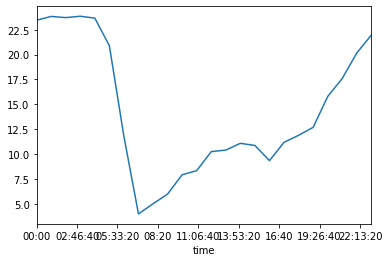

In [89]:
#Let's see how does this look in a plot
oct_wd_1_sample.num_bikes_available.plot()

In [90]:
oct_wd_1_sample.reset_index(inplace=True)

In [91]:
oct_wd_1_sample = oct_wd_1_sample[['time','num_bikes_available']]

In [92]:
oct_wd_1_sample = oct_wd_1_sample.transpose()

In [93]:
oct_wd_1_sample = oct_wd_1_sample.rename(columns=oct_wd_1_sample.iloc[0])

In [94]:
oct_wd_1_sample.drop(index='time',inplace=True)

In [95]:
oct_wd_1_sample

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
num_bikes_available,23.4468,23.8294,23.7129,23.8498,23.6631,20.8925,11.7826,4.00697,5.02653,6.00041,...,11.0939,10.8792,9.35462,11.1955,11.8973,12.698,15.794,17.6074,20.1646,21.964


## The code that sums everything up
Now is time to manipulate the data in a way that can be used by the model to define the clusters. The objective is to convert the information in 'num_bikes_available' per hour, per station, in a single row.

In [96]:
oct_wd['time'] = [d.time() for d in oct_wd['last_updated']]

C:\Users\jaume\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [97]:
oct_wd.head()

,station_id,num_bikes_available,num_docks_available,status,last_updated,ttl,time
0,1,27,2,1,2019-10-01 00:05:10,20,00:05:10
1,2,12,15,1,2019-10-01 00:05:10,20,00:05:10
2,3,18,9,1,2019-10-01 00:05:10,20,00:05:10
3,4,14,4,1,2019-10-01 00:05:10,20,00:05:10
4,5,36,2,1,2019-10-01 00:05:10,20,00:05:10


In [100]:
stations = oct_wd.station_id.unique().tolist()
d = []
for s in stations:
    sample = oct_wd[oct_wd['station_id'] == s]
    sample = sample.resample('H', on='last_updated').mean()
    sample.reset_index(inplace=True)
    sample['time'] = [d.time() for d in sample['last_updated']]
    sample = sample.groupby('time').mean()
    sample.reset_index(inplace=True)
    final_sample = sample[['time','num_bikes_available']].transpose()
    try:
        d.append({'station_id': s, '00:00': round(final_sample[0].loc['num_bikes_available'],2), '01:00':
        round(final_sample[1].loc['num_bikes_available'],2), '02:00':
        round(final_sample[2].loc['num_bikes_available'],2), '03:00':
        round(final_sample[3].loc['num_bikes_available'],2), '04:00':
        round(final_sample[4].loc['num_bikes_available'],2), '05:00':
        round(final_sample[5].loc['num_bikes_available'],2), '06:00':
        round(final_sample[6].loc['num_bikes_available'],2), '07:00':
        round(final_sample[7].loc['num_bikes_available'],2), '08:00':
        round(final_sample[8].loc['num_bikes_available'],2), '09:00':
        round(final_sample[9].loc['num_bikes_available'],2), '10:00':
        round(final_sample[10].loc['num_bikes_available'],2), '11:00':
        round(final_sample[11].loc['num_bikes_available'],2), '12:00':
        round(final_sample[12].loc['num_bikes_available'],2), '13:00':
        round(final_sample[13].loc['num_bikes_available'],2), '14:00':
        round(final_sample[14].loc['num_bikes_available'],2), '15:00':
        round(final_sample[15].loc['num_bikes_available'],2), '16:00':
        round(final_sample[16].loc['num_bikes_available'],2), '17:00':
        round(final_sample[17].loc['num_bikes_available'],2), '18:00':
        round(final_sample[18].loc['num_bikes_available'],2), '19:00':
        round(final_sample[19].loc['num_bikes_available'],2), '20:00':
        round(final_sample[20].loc['num_bikes_available'],2), '21:00':
        round(final_sample[21].loc['num_bikes_available'],2), '22:00':
       round(final_sample[22].loc['num_bikes_available'],2), '23:00':
        round(final_sample[23].loc['num_bikes_available'],2)})
    except KeyError:
        continue
    
                             
features = pd.DataFrame(d)

In [102]:
#We set station_id as our index
features = features.set_index('station_id',drop=True)

# Adding max capacity of the station as a feature
We want to understand if size of the station can be relevant to understand its behaviour and, if it does, if there is any station which size is maybe not suitable, maybe there are some big ones that expected lots of traffic that actually do not, and some small ones which do not match the needs of the area.

In [103]:
oct_max = octubre.groupby('station_id').max()
oct_max.head()

,num_bikes_available,num_docks_available,status,last_updated,ttl,date,time
station_id,,,,,,,
1,30,30,1,2019-10-31 22:55:30,30,2019-10-31,23:59:58
2,27,27,1,2019-10-31 22:55:30,30,2019-10-31,23:59:58
3,27,27,1,2019-10-31 22:55:30,30,2019-10-31,23:59:58
4,21,21,1,2019-10-31 22:55:30,30,2019-10-31,23:59:58
5,39,39,1,2019-10-31 22:55:30,30,2019-10-31,23:59:58


In [104]:
oct_max.drop(columns=["num_docks_available","status","last_updated","ttl","date","time"],inplace=True)

In [105]:
oct_max = oct_max.rename(columns={"num_bikes_available":"capacity"})

In [106]:
features = pd.merge(features, oct_max, on="station_id")

In [107]:
features.head()

,00:00,01:00,02:00,03:00,04:00,05:00,06:00,07:00,08:00,09:00,...,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,capacity
station_id,,,,,,,,,,,,,,,,,,,,,
1,23.45,23.83,23.71,23.85,23.66,20.89,11.78,4.01,5.03,6.00,...,10.88,9.35,11.20,11.90,12.70,15.79,17.61,20.16,21.96,30
2,13.52,14.10,13.80,13.48,13.40,11.88,7.34,3.51,3.19,4.34,...,11.47,10.91,8.33,6.91,7.28,8.78,10.33,12.42,12.66,27
3,16.59,16.69,16.76,16.66,16.36,16.76,14.39,7.89,4.04,3.50,...,15.55,17.80,18.65,19.57,18.42,16.54,16.12,16.38,17.25,27
4,9.78,9.74,9.94,10.39,11.53,14.07,10.06,4.90,2.04,2.82,...,13.15,13.42,15.02,15.48,13.53,11.53,9.66,9.61,10.53,21
5,24.42,24.39,24.24,23.87,24.26,23.06,18.66,9.33,8.24,10.15,...,15.59,19.28,26.19,30.29,27.05,27.04,27.42,26.78,24.82,39


In [108]:
features.to_csv("..\\Dataset\\datetime_features.csv",encoding="utf_8")